# Magnetic field of a charged wire

![hand](figure_05_hand.svg)

https://upload.wikimedia.org/wikipedia/commons/3/3e/Manoderecha.svg

Using the Maxwell equations of magnetostatics (in their integral form) one can derive the vector potential of a current density distribution \\( \vec{j}(\vec{r}) \\)

\\( 
\vec{A}(\vec{r})=\frac{\mu_0}{4\pi}\int\frac{\vec{j}(\vec{r}')}{|\vec{r}-\vec{r}'|}\,\mathrm{d}V'\\
\\)

from which we can calculate the magnetic field 

\\( 
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})\\
\\)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Straight wire

- along z axis
- very long: length \\( [-l_0,l_0]\\) (we will only consider the xy plane, because all other planes will behave equally)
- very thin: radius \\(r_0\\) (basically non-zero only for x = 0, y = 0)

In [2]:
mu0 = 1

# straight wire
j0 = 1 # Ampere / meter^2
r0 = 0.001 # m
l0 = 1000 # m

def j(r):
    #if np.sqrt(r[0]**2 + r[1]**2) > r0:
    #    return np.array([0.0, 0.0, 0.0])
    #else:
    return np.array([0.0, 0.0, j0])

In [3]:
j(np.array([0, 0, 5]))

array([0., 0., 1.])

In [4]:
coord_max = 4.9
num_points= 50
d = 2*coord_max / (num_points - 1)

# coordinates: standard index is ywz, fix by using "indexing='ij'"
coords = np.array(np.meshgrid(np.linspace(-coord_max, coord_max, num_points),
                              np.linspace(-coord_max, coord_max, num_points),
                              np.zeros(1),
                              indexing='ij'
                             ))

In [5]:
print(coords[:, num_points//2-1, num_points//2, 0])
print(coords[:, num_points//2, num_points//2, 0])

[-0.1  0.1  0. ]
[0.1 0.1 0. ]


In [6]:
# vector potential

A = np.array(np.meshgrid(np.zeros(num_points),
                         np.zeros(num_points),
                         np.zeros(1),
                         indexing='ij'
                        ))

In [7]:
print(coords[:, num_points//2-1, num_points//2, 0])
print(coords[:, num_points//2, num_points//2, 0])

[-0.1  0.1  0. ]
[0.1 0.1 0. ]


In [8]:
num_int = 5001

for ix in np.arange(num_points):
    for iy in np.arange(num_points):
        # position r for which we are currently calculating A
        r = np.array([-coord_max+ix*d, -coord_max+iy*d, 0.0])
        for zj in np.linspace(-l0,l0,num_int):
            # we integrate of all rj in the wire
            rj = np.array([ 0.0, 0.0, zj ])
            A[:,ix,iy,0] = A[:,ix,iy,0] + j(rj) / np.sqrt( r[0]**2 + r[1]**2 + rj[2]**2 )

In [9]:
dz = (2*l0) / (num_int - 1)
#dx = (2*coord_max) / (num_points - 1)
#dy = (2*coord_max) / (num_points - 1)
#A = A * mu0 / (4*np.pi) * dx * dy * dz
df = np.pi * r0**2
A = A * mu0 / (4*np.pi) * df * dz

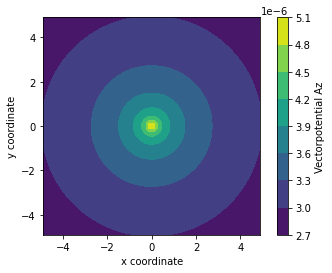

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

plt.contourf( coords[0,:,:,0], coords[1,:,:,0], A[2,:,:,0] )
cbar = plt.colorbar()
cbar.set_label('Vectorpotential Az')

__Analytical solution:__

\\( \vec{A}(\vec{r}) = \frac{\mu_0}{2\pi}jF\log\frac{2l_0}{\sqrt{x^2+y^2}}\vec{e}_z\\)

![derivation_wire](figure_05_derivation_wire.png)

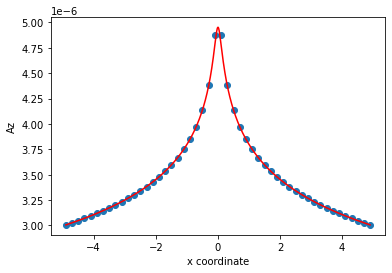

In [11]:
plt.xlabel('x coordinate')
plt.ylabel('Az')

plt.scatter(coords[0,:,num_points//2,0], A[2,:,num_points//2,0])

x_list = np.linspace(-coord_max, coord_max, 10001)
plt.plot(
    x_list,
    mu0/(2*np.pi) * j0 * df * np.log(2*l0/np.sqrt(x_list**2 + coords[1,0,num_points//2,0]**2)),
    'red'
    )

__We can calculate the magnetic field__

\\( 
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})=\begin{pmatrix}
\frac{\partial}{\partial y}A_z(\vec{r}) - \frac{\partial}{\partial z}A_y(\vec{r})\\
\frac{\partial}{\partial z}A_x(\vec{r}) - \frac{\partial}{\partial x}A_z(\vec{r})\\
\frac{\partial}{\partial x}A_y(\vec{r}) - \frac{\partial}{\partial y}A_x(\vec{r})\\
\end{pmatrix}=\begin{pmatrix}
\frac{\partial}{\partial y}A_z(\vec{r})\\
 - \frac{\partial}{\partial x}A_z(\vec{r})\\
\frac{\partial}{\partial x}A_y(\vec{r}) - \frac{\partial}{\partial y}A_x(\vec{r})\\
\end{pmatrix}\\
\\)

Since the vector potential only changes in the xy plane and is considered to be constant along z (for infinite \\(l_0\\)), we know
\\( 
\frac{\partial }{\partial z} A_x(\vec{r}) = \frac{\partial }{\partial z} A_y(\vec{r}) = 0
\\)

In [12]:
# create empty array for magnetic field

B = np.array(np.meshgrid(np.zeros(num_points),
                         np.zeros(num_points),
                         np.zeros(1),
                         indexing='ij'
                        ))

In [13]:
B[0,1:-1,1:-1,0] = (A[2,1:-1,2:,0] - A[2,1:-1,:-2,0]) / (2*d)
B[1,1:-1,1:-1,0] = -(A[2,2:,1:-1,0] - A[2,:-2,1:-1,0]) / (2*d)
B[2,1:-1,1:-1,0] = (A[1,2:,1:-1,0] - A[1,:-2,1:-1,0]) / (2*d) - (A[0,1:-1,2:,0] - A[0,1:-1,:-2,0]) / (2*d)

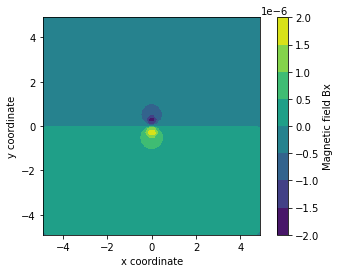

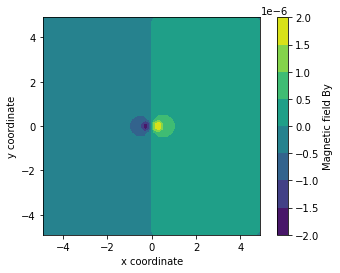

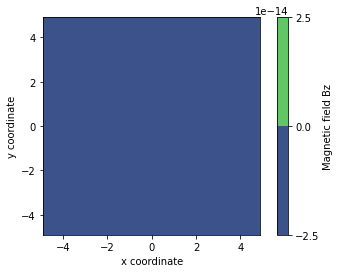

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.contourf( coords[0,:,:,0], coords[1,:,:,0], B[0,:,:,0] )
cbar = plt.colorbar()
cbar.set_label('Magnetic field Bx')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.contourf( coords[0,:,:,0], coords[1,:,:,0], B[1,:,:,0] )
cbar = plt.colorbar()
cbar.set_label('Magnetic field By')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.contourf( coords[0,:,:,0], coords[1,:,:,0], B[2,:,:,0] )
cbar = plt.colorbar()
cbar.set_label('Magnetic field Bz')
plt.show()

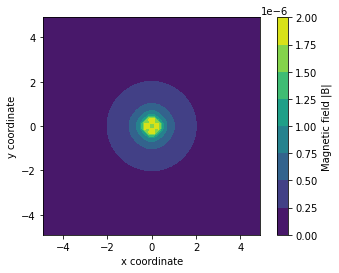

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.contourf( coords[0,:,:,0], coords[1,:,:,0], np.sqrt( B[0,:,:,0]**2 + B[1,:,:,0]**2 + B[2,:,:,0]**2 ) )
cbar = plt.colorbar()
cbar.set_label('Magnetic field |B|')
plt.show()

__Analytical solution:__

\\( \vec{B}(\vec{r}) = \frac{\mu_0}{2\pi}jF\frac{1}{\sqrt{x^2+y^2}}\begin{pmatrix}-y\\x\\0\end{pmatrix}\\)

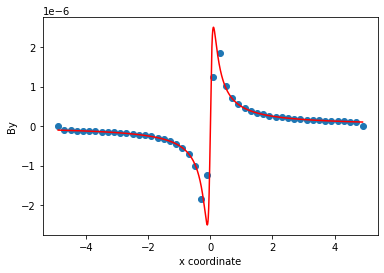

In [16]:
plt.xlabel('x coordinate')
plt.ylabel('By')

plt.scatter(coords[0,:,num_points//2,0], B[1,:,num_points//2,0])

x_list = np.linspace(-coord_max, coord_max, 10001)
plt.plot(
    x_list,
    mu0/(2*np.pi) * j0 * df / np.sqrt( x_list**2 + coords[1,0,num_points//2,0]**2 )**2 * x_list,
    'red')

![hand](figure_05_hand.svg)

In [17]:
# change standard size of all figures in this notebook
plt.rcParams['figure.figsize'] = [40, 15]

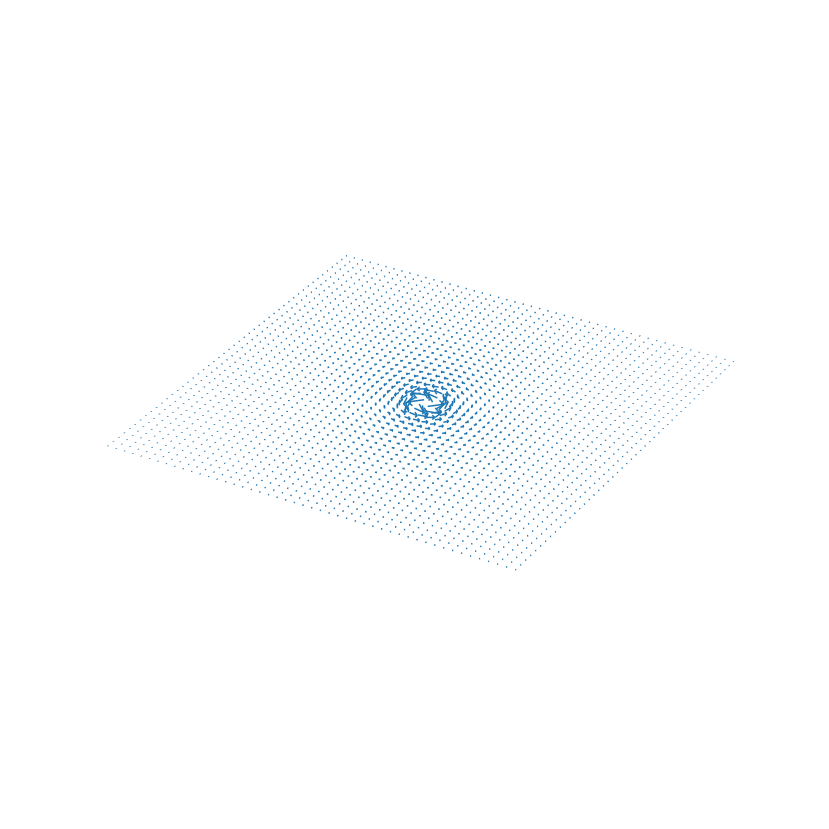

In [18]:
arrowplot = plt.axes(projection='3d')
arrowplot.set_zlim([-1,1])

#backgrouond invisble
arrowplot.axis(False)

scale = 0.2e6
arrowplot.quiver(
    coords[0], coords[1], coords[2],
    B[0]*scale, B[1]*scale, B[2]*scale
)